# Mini Project 2 - David Wang

## Task 1

Let's compute an expression for the gradient $\nabla_{\textbf{w}} f(\textbf{x})$ $$f(\textbf{w}) = w_1 \phi(w_2x_1+w_3x_2+w_4x_3+w_5) + w_6 \phi(w_7x_1+w_8x_2+w_9x_3 + w_{10}) + w_{11} \phi(w_{12}x_1+w_{13}x_2+w_{14}x_3+w_{15}) + w_{16}$$
$$\nabla_{\textbf{w}} f(\textbf{x}) = \begin{bmatrix} \frac{\partial f}{\partial w_1} \\ \frac{\partial f}{\partial w_2} \\ \vdots \\ \frac{\partial f}{\partial w_{16}} \end{bmatrix} = \begin{bmatrix} \phi(w_2x_1+w_3x_2+w_4x_3+w_5) \\ w_1x_1\phi'(w_2x_1+w_3x_2+w_4x_3+w_5) \\ w_1x_2\phi'(w_2x_1+w_3x_2+w_4x_3+w_5) \\ w_1x_3\phi'(w_2x_1+w_3x_2+w_4x_3+w_5) \\ w_1\phi'(w_2x_1+w_3x_2+w_4x_3+w_5) \\ \phi(w_7x_1+w_8x_2+w_9x_3 + w_{10}) \\ w_6x_1\phi'(w_7x_1+w_8x_2+w_9x_3 + w_{10}) \\ w_6x_2\phi'(w_7x_1+w_8x_2+w_9x_3 + w_{10}) \\ w_6x_3\phi'(w_7x_1+w_8x_2+w_9x_3 + w_{10}) \\ w_6\phi'(w_7x_1+w_8x_2+w_9x_3 + w_{10}) \\ \phi(w_{12}x_1+w_{13}x_2+w_{14}x_3+w_{15}) \\ w_{11}x_1\phi'(w_{12}x_1+w_{13}x_2+w_{14}x_3+w_{15}) \\ w_{11}x_2\phi'(w_{12}x_1+w_{13}x_2+w_{14}x_3+w_{15}) \\ w_{11}x_3\phi'(w_{12}x_1+w_{13}x_2+w_{14}x_3+w_{15}) \\ w_{11}\phi'(w_{12}x_1+w_{13}x_2+w_{14}x_3+w_{15}) \\ 1 \end{bmatrix}$$ where $\phi(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ and $\phi'(x) = \frac{(e^x+e^{-x})(e^x + e^{-x}) - (e^x - e^{-x})(e^x - e^{-x})}{(e^x + e^{-x})^2} = 1-\phi^2(x)$.

## Task 2

Now we're going to compute the derivative matrix $\textbf{Dr}(\textbf{w})$
$$\textbf{r}(w)=\begin{bmatrix} r_1(w) \\ r_2(w) \\ \vdots \\ r_{N}(w) \end{bmatrix}$$ The derivative matrix is therefore $$\begin{bmatrix}
\nabla_{\textbf{w}} r_1(\textbf{w})^T \\
\nabla_{\textbf{w}} r_2(\textbf{w})^T \\
\vdots \\
\nabla_{\textbf{w}} r_{N}(\textbf{w})^T
\end{bmatrix}$$
Note that $$ r_i(\textbf{w}) = f_{\textbf{w}}(\textbf{x}^{(n)}) - y^{(n)} \qquad n = 1, 2, \dots, N$$
Since $y^{(n)}$ is a constant that doesn't depend on $\textbf{w}$, we can ignore it when computing the derivative matrix. Therefore, $$\textbf{Dr}(\textbf{w}) = \begin{bmatrix}
\nabla_{\textbf{w}} f_{\textbf{w}}(\textbf{x}^{(1)})^T \\
\nabla_{\textbf{w}} f_{\textbf{w}}(\textbf{x}^{(2)})^T \\
\vdots \\
\nabla_{\textbf{w}} f_{\textbf{w}}(\textbf{x}^{(N)})^T
\end{bmatrix}$$ with $\nabla_{\textbf{w}} f_{\textbf{w}}(\textbf{x}^{(n)})$ computed in Task 1.

## Task 3

### (a) First we'll write code implementing the Levenberg-Marquardt algorithm.

In [1]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The Levenberg-Marquardt algorithm is an iterative method for solving the nonlinear least squares problem. We first need to define the first order Taylor approximation of our function $\textbf{r}(\textbf{w})$ around the current estimate $\textbf{w}^{(k)}$ $$\textbf{r}(\textbf{w};\textbf{w}^{(k)}) = \textbf{r}(\textbf{w}^{(k)}) + \textbf{Dr}(\textbf{w}^{(k)})(\textbf{w} - \textbf{w}^{(k)})$$
 For each iteration, we want to choose $w^{(k+1)}$ such that it is a solution to the following:
    $$\min_{\textbf{w}}\Vert\textbf{r}(\textbf{w};\textbf{w}^{(k)})\Vert_2^2 + \lambda^{(k)}\Vert \textbf{w}-\textbf{w}^{(k)} \Vert$$
Substituting the first order Taylor approximation into the above expression, we get
$$\min_{\textbf{w}}\Vert\textbf{r}(\textbf{w}^{(k)}) + \textbf{Dr}(\textbf{w}^{(k)})(\textbf{w} - \textbf{w}^{(k)})\Vert_2^2 + \lambda^{(k)}\Vert \textbf{w}-\textbf{w}^{(k)} \Vert = \min_{\textbf{w}}\Vert\textbf{Dr}(\textbf{w}^{(k)})\textbf{w} - (\textbf{Dr}(\textbf{w}^{(k)})\textbf{w}^{(k)} - \textbf{r}(\textbf{w}^{(k)}))\Vert_2^2 + \Vert \sqrt{\lambda^{(k)}}\textbf{w}-\sqrt{\lambda^{(k)}}\textbf{w}^{(k)} \Vert_2^2$$
This minimization problem is now in the form of a multi-objective least squares problem. By stacking, we can rewrite the above expression as:
$$\min_{\textbf{w}}\left\Vert\begin{bmatrix} \textbf{Dr}(\textbf{w}^{(k)}) \\ \sqrt{\lambda^{(k)}}\textbf{I} \end{bmatrix}\textbf{w} - \begin{bmatrix} \textbf{Dr}(\textbf{w}^{(k)})\textbf{w}^{(k)} - \textbf{r}(\textbf{w}^{(k)}) \\ \sqrt{\lambda^{(k)}}\textbf{w}^{(k)} \end{bmatrix}\right\Vert_2^2$$
Applying the normal equation, we get:
$$\textbf{w}^{(k+1)} = \textbf{w}^{(k)} - \left(\textbf{Dr}(\textbf{w}^{(k)})^T\textbf{Dr}(\textbf{w}^{(k)}) + \lambda^{(k)}\textbf{I}\right)^{-1}\textbf{Dr}(\textbf{w}^{(k)})^T\textbf{r}(\textbf{w}^{(k)})$$
Then, we check if $\Vert\textbf{r}(\textbf{w}^{(k+1)})\Vert_2^2 < \Vert\textbf{r}(\textbf{w}^{(k)})\Vert_2^2$. If so, we scale $\lambda^{(k)}$ by $0.8$ and set $\textbf{w}^{(k)} = \textbf{w}^{(k+1)}$. Otherwise, we increase $\lambda^{(k)}$ by a factor of $2$ and do not update $\textbf{w^{(k)}}$. We repeat this process until either $\Vert 2\textbf{Dr}(\textbf{w}^{(k+1)})^T\textbf{r}(\textbf{w}^{(k+1)})\Vert_2^2 < 10^{-2}$ or $\Vert\textbf{r}(\textbf{w}^{(k + 1)})\Vert_2^2 < 10^{-2}$

In [2]:
# our nonlinear function
def g(x):
    return x[0]*x[1] + x[2]

# hyperbolic tangent function
def phi(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def phi_prime(x):
    return 1 - phi(x)**2

def r(x, y, w):
    vector = np.array([])
    for i in range(len(x)):
        vector = np.append(vector, w[0] * phi(w[1:4] @ x[i] + w[4]) + w[5] * phi(w[6:9] @ x[i] + w[9]) + w[10] * phi(w[11:14] @ x[i] + w[14]) + w[15] - y[i])
    return vector

def training_loss(x, y, w, lam):
    return np.inner(r(x, y, w), r(x, y, w)) + lam * np.inner(w, w)

# identity matrix for future use
I = np.identity(16)

In [3]:
# helper functions to compute Dr
def gradient(x, w):
    return np.array([phi(w[1]*x[0] + w[2]*x[1] + w[3]*x[2] + w[4]), 
        w[0]*x[0]*phi_prime(w[1]*x[0] + w[2]*x[1] + w[3]*x[2] + w[4]), 
        w[0]*x[1]*phi_prime(w[1]*x[0] + w[2]*x[1] + w[3]*x[2] + w[4]), 
        w[0]*x[2]*phi_prime(w[1]*x[0] + w[2]*x[1] + w[3]*x[2] + w[4]), 
        w[0]*phi_prime(w[1]*x[0] + w[2]*x[1] + w[3]*x[2] + w[4]),
        phi(w[6]*x[0] + w[7]*x[1] + w[8]*x[2] + w[9]),
        w[5]*x[0]*phi_prime(w[6]*x[0] + w[7]*x[1] + w[8]*x[2] + w[9]),
        w[5]*x[1]*phi_prime(w[6]*x[0] + w[7]*x[1] + w[8]*x[2] + w[9]),
        w[5]*x[2]*phi_prime(w[6]*x[0] + w[7]*x[1] + w[8]*x[2] + w[9]),
        w[5]*phi_prime(w[6]*x[0] + w[7]*x[1] + w[8]*x[2] + w[9]),
        phi(w[11]*x[0] + w[12]*x[1] + w[13]*x[2] + w[14]),
        w[10]*x[0]*phi_prime(w[11]*x[0] + w[12]*x[1] + w[13]*x[2] + w[14]),
        w[10]*x[1]*phi_prime(w[11]*x[0] + w[12]*x[1] + w[13]*x[2] + w[14]),
        w[10]*x[2]*phi_prime(w[11]*x[0] + w[12]*x[1] + w[13]*x[2] + w[14]),
        w[10]*phi_prime(w[11]*x[0] + w[12]*x[1] + w[13]*x[2] + w[14]),
        1])

def jacobian(x, w):
    matrix = gradient(x[0], w)
    for i in range(1, len(x)):
        matrix = np.vstack((matrix, gradient(x[i], w)))
    return matrix

In [4]:
# levenberg-marquardt algorithm
# inputs: x and y pairs, lambda, initial w vector
# output: optimal w vector

def levenberg_marquardt(x, y, lam, w0):
    # initialize
    w = w0
    
    loss = np.array([])
    
    # iterate until stopping criterion is met
    while True:
        
        function = r(x, y, w)
        
        # compute Dr(w)
        Dr = jacobian(x, w)

        w_next = w - (np.linalg.inv(Dr.T @ Dr + lam * I) @ Dr.T @ function)
        
        # check tentative iterate
        function_next = r(x, y, w_next)
        if np.inner(function_next, function_next) < np.inner(function, function):
            lam = 0.8 * lam
            w = w_next
            function = function_next
        else:
            lam = 2 * lam
        
        # training loss
        loss = np.append(loss, training_loss(x, y, w, lam))
        # stopping criterion
        optimality = np.linalg.norm(2 * Dr.T @ function)
        small_residual = np.inner(function, function)
        print(str(small_residual) + " " + str(optimality))
        if small_residual < 10**-3 or optimality < 10**(-2):
            return w, loss

### Training our algorithm

In [5]:
# generate data
np.random.seed(2023)

# get x values between -1 and 1
x = np.random.rand(500, 3) * 2 - 1

# get y values
y = np.array([])
for i in range(len(x)):
    y = np.append(y, g(x[i]))

In [6]:
# initialize w
w0 = np.random.rand(16)


In [7]:
w0

array([0.93598278, 0.16108613, 0.0260887 , 0.89908976, 0.75798436,
       0.01179386, 0.79718855, 0.03434188, 0.19466135, 0.20290228,
       0.60466474, 0.47143157, 0.22701238, 0.69724592, 0.27901237,
       0.05160081])

In [8]:
w, loss = levenberg_marquardt(x, y, 10**-4, w0)

334.62863759266605 1038.8863667808112
334.62863759266605 1038.8863667808112
334.62863759266605 1038.8863667808112
334.62863759266605 1038.8863667808112
334.62863759266605 1038.8863667808112
334.62863759266605 1038.8863667808112
334.62863759266605 1038.8863667808112
334.62863759266605 1038.8863667808112
334.62863759266605 1038.8863667808112
334.62863759266605 1038.8863667808112
334.62863759266605 1038.8863667808112
334.62863759266605 1038.8863667808112
334.62863759266605 1038.8863667808112
184.39650665013795 568.1929747587086
184.39650665013795 634.0271080586617
184.39650665013795 634.0271080586617
184.39650665013795 634.0271080586617
101.92237156838944 355.8776650387466
65.17774273684368 285.59574447761497
65.17774273684368 274.028702653475
44.044524424113995 153.18074875933362
23.48153272874221 72.83052295414672
16.165701942485736 25.519936957449197
13.860635149003201 40.18965788015912
8.91282112524231 45.66593957806478
3.3549185668663513 61.10394123866692
1.7110310993133424 23.496411

#### Plotting the training loss

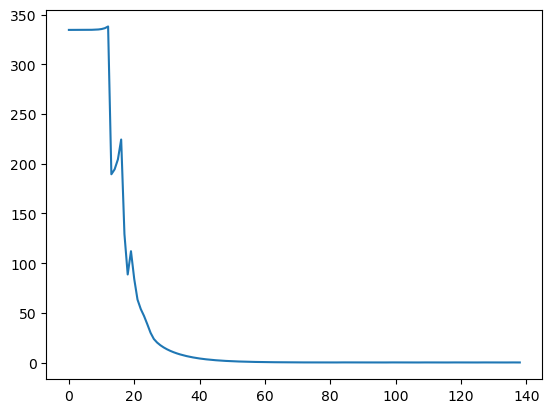

In [9]:
plt.plot(loss)

array([3.34629479e+02, 3.34630321e+02, 3.34632004e+02, 3.34635370e+02,
       3.34642102e+02, 3.34655566e+02, 3.34682494e+02, 3.34736351e+02,
       3.34844064e+02, 3.35059491e+02, 3.35490344e+02, 3.36352050e+02,
       3.38075463e+02, 1.89391190e+02, 1.94385873e+02, 2.04375239e+02,
       2.24353970e+02, 1.29220407e+02, 8.85878178e+01, 1.11997893e+02,
       8.39716236e+01, 6.33164984e+01, 5.37776118e+01, 4.68123676e+01,
       3.85216439e+01, 2.98756585e+01, 2.36812312e+01, 2.00944879e+01,
       1.74020634e+01, 1.52083457e+01, 1.33641331e+01, 1.17893004e+01,
       1.04282654e+01, 9.24175433e+00, 8.20115439e+00, 7.28480612e+00,
       6.47564760e+00, 5.75978355e+00, 5.12560522e+00, 4.56323529e+00,
       4.06416248e+00, 3.62098950e+00, 3.22725000e+00, 2.87726944e+00,
       2.56605495e+00, 2.28920534e+00, 2.04283585e+00, 1.82351413e+00,
       1.62820517e+00, 1.45422358e+00, 1.29919192e+00, 1.16100433e+00,
       1.03779460e+00, 9.27908137e-01, 8.29877350e-01, 7.42399944e-01,
      

In [10]:
test = [-0.6, 0.1, -.1]
print(test)
print(w[0] * phi(w[1:4] @ test + w[4]) + w[5] * phi(w[6:9] @ test + w[9]) + w[10] * phi(w[11:14] @ test + w[14]) + w[15], g(test))


[-0.6, 0.1, -0.1]
-0.16057981839461366 -0.16


In [79]:
print(r(x[0:2], y[0:2], w))

[[-0.35602339  0.7808449   0.17610451]
 [-0.74680781 -0.71731755 -0.06420882]]
[]
[[-0.35602339  0.7808449   0.17610451]
 [-0.74680781 -0.71731755 -0.06420882]]
[-0.00214422]
[-0.00214422 -0.00018823]
